<a href="https://colab.research.google.com/github/thual/mecanique-des-milieux-continus/blob/main/Animpoiscouette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Olivier THUAL, Toulouse INP le 30/10/2021. LicenceCC BY-SA* 
# Écoulements de Poiseuille - Couette

Ce programme interactif se rapporte à l'exercice IIa du chapitre 8 du cours de [Mécanique des milieux continus](http://pedagotech.inp-toulouse.fr/121018). 

On s'intéresse à l'écoulement de Poiseuille - Couette suivant : 
$$ U(z) = \beta \, l^2 \left[1- \left( {z\over l}\right)^2\right]+ U_* \left( {1\over 2} +{z\over 2\,l}\right)\;. $$
où $\beta = {P_0-P_L \over 2 \nu_n \rho_o L}$ est proportionnel au gradient de pression et $U_*$ est le vitesse qui intervient dans les conditions aux limites $U(-l)=0$ et $U(l) = U_*$. 

On adimensionne le champ de vitesse de la façon suivante :
$$\widetilde U\left(z\over l\right) = {U(z) \over U_p + U_c}\,$$
avec $U_p =\beta l^2$ et $U_c = U_*$. On a donc : 
$$ \widetilde U(\zeta) = \Lambda_p \left(1- \zeta^2\right) + \Lambda_c \left({1\over 2} + {\zeta\over 2}\right)\;,$$
avec $\Lambda_p = U_p/(U_p+U_c)$ et $\Lambda_c = U_c/(U_p+U_c)$. On a $\Lambda_p+\Lambda_c=1$. 

On souhaite tracer les profils $\widetilde U(\zeta)$ pour $\Lambda_p \in [0,1]$, ce qui permet de visualiser les profils de vitesse $U(z) = (\beta \, l^2 + U_*) \, \widetilde U(z/l)$. 


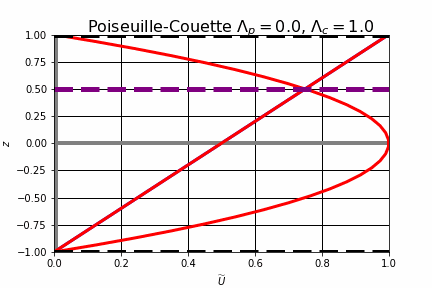

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme !

In [70]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def zfi(x,le=3):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

def animate(Lap):
    ax.clear()
    # Poiseuille et Couette
    Up=(1-ze**2)
    Uc=(.5+.5*ze)
    U=np.concatenate((Up,Uc))
    Z=np.concatenate((ze,ze))
    ax.plot(U,Z,linewidth=3,color="red")
    # Profil de vitesse
    Lapr=round(Lap,1); Lac=round(1-Lap,1);
    U=Lapr*(1-ze**2)+Lac*(.5+.5*ze)
    ax.set_title(r"Poiseuille-Couette $\Lambda_p=$"+zfi(Lapr,0)
       +", $\Lambda_c=$"+zfi(Lac,0))
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    ax.set_ylabel(r'$z$'); 
    ax.set_xlabel(r'$\widetilde{U}$')
    ax.set_xlim(0,Umax); 
    ax.set_ylim(-1,1)
    ax.axvline(0,linewidth=7,color='grey')
    ax.axhline(0,linewidth=4,color='grey')
    ax.plot(U,ze,linewidth=3,color="blue")
    ax.plot([0,Umax],[1,1],"--",linewidth=5,color='black')
    ax.plot([0,Umax],[-1,-1],"--",linewidth=5,color='black')
    ax.plot([0,Umax],[.5,.5],"--",linewidth=5,color='purple')

Vous pouvez modifier de le paramètre suivant : 


*   `dL` : Pas du tracé pour $\Lambda_p$
*   `Gifanime` : True pour sauver un gif anime

Exécutez la programme suivant pour visualiser les figures au bas de la page ! 


In [71]:
# Paramètre pouvant être changé
dL=.1; # Pas pour le tracé de Lap
Gifanime=False # True pour sauver un gif anime

# Paramètre dérivés
Lap=dL; Lac=1-Lap; 
tab=np.concatenate((np.arange(0,1+dL,dL),np.arange(1,-dL,-dL)))

# Vertical coordinate
Nz=31;  
ze=np.linspace(-1,1,Nz+1); 
 
# For figure and animation
dela=200;
Umax=1; 

# Prepare figure
fig=plt.figure(1,figsize=(7,5))
ax=plt.subplot(1,1,1)
     
# Animation
ani=FuncAnimation(fig,animate,frames=tab,interval=dela)

# Création d'un gif animé
if Gifanime:
  namegif="poiscou.gif"
  print("==================================")
  print("Simulation pour créer un gif animé")  
  ani.save(namegif,writer="pillow")
  print("Gif animé créé :",namegif)


# Visualisation animée de la simulation 
print("\nSimulation pour visualiser l'animation")   
plt.close() 
plt.rc('animation', html='jshtml')
ani


Simulation pour visualiser l'animation


# Superposition de tous les profils :

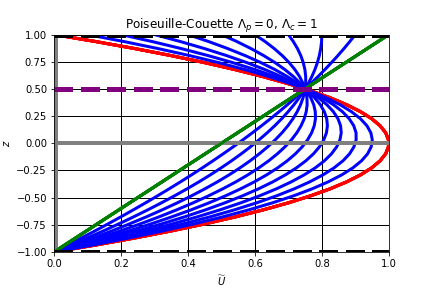